# Predictive maintenance of a CNC milling machine

## Predictive maintenance

To be continued...

## Experimental set-up

<img src="figures/exp_setup.png" alt="experimental setup" width="600"/>

*Experimental set-up (Source: [Multi-modal Sensing for Machine Health Monitoring in High Speed Machining](https://ieeexplore.ieee.org/document/4053566))*

#### Cutter or milling bit

The tool doing the cutting is called a milling bit and it can have multiple flutes i.e sharp slots that corkscrew upwards along the length of the milling bit.

<img src="figures/flutes.png" alt="flutes_explanation" width="450"/>

*Visualization of flutes (Source: [https://www.cs.cmu.edu/~rapidproto/students.03/zdb/project2/CNCflutes.htm](https://www.cs.cmu.edu/~rapidproto/students.03/zdb/project2/CNCflutes.htm))*

#### Dynamometer

The dynamometer is set on the machine table holding the metal workpiece, allowing it to measure forces applied to the workpiece in three dimensions.

<img src="figures/dynamometer.jpg" alt="dynamomter" width="400"/>

*Dynamometer set-up (Source: [Cutting forces during longitudinal turning process of Ti-6Al-4V ELI alloy. Theoretical and experimental values](https://www.researchgate.net/publication/329478165_Cutting_forces_during_longitudinal_turning_process_of_Ti-6Al-4V_ELI_alloy_Theoretical_and_experimental_values))*

#### Accelerometer

Accelerometers are mounted on the workpiece itself and measure the vibrations felt by the workpiece.

<img src="figures/accelerometer.jpg" alt="dynamomter" width="400"/>

*Accelerometer set-up (Source: [Guidelines for Mounting Test Accelerometers](https://www.pcb.com/resources/technical-information/mounting))*

#### Acoustic Emission (AE) sensor

The acoustic emission sensor is mounted on the workpiece and detects elastic waves that go through the workpiece in events like friction, cracks and deformation.

<img src="figures/ae_sensor.png" alt="dynamomter" width="400"/>

*Acoustic emission sensor set-up (Source: [Identification of tool wear using acoustic emission signal and machine learning methods](https://www.sciencedirect.com/science/article/pii/S0141635921001884))*

## Dataset description

The raw downloaded data is placed in the `data/raw/` directory and unziped. The data has an internal directory structure:

```
├── c1 
│   ├── c1
│   │   ├── c_1_001.csv
│   │   ├── c_1_002.csv
│   │   ├── ...
│   ├── c1_wear.csv
├── c2 
│   ├── c2
│   │   ├── c_2_001.csv
│   │   ├── c_2_002.csv
│   │   ├── ...
├── c3 
│   ├── c3
│   │   ├── c_3_001.csv
│   │   ├── c_3_002.csv
│   │   ├── ...
├── c4 
│   ├── c4
│   │   ├── c_4_001.csv
│   │   ├── c_4_002.csv
│   │   ├── ...
│   ├── c4_wear.csv
├── c5 
│   ├── c5
│   │   ├── c_5_001.csv
│   │   ├── c_5_002.csv
│   │   ├── ...
├── c6 
│   ├── c6
│   │   ├── c_6_001.csv
│   │   ├── c_6_002.csv
│   │   ├── ...
│   ├── c6_wear.csv

```



Each `c$number/c$number` directory corresponds to a test of 315 cuts measured by the monitoring system mounted on the CNC milling machine as it removed material off the metal piece. The data the monitoring system recorded was:

* Column 1: Force (N) in X dimension
* Column 2: Force (N) in Y dimension
* Column 3: Force (N) in Z dimension
* Column 4: Vibration (g) in X dimension
* Column 5: Vibration (g) in Y dimension
* Column 6: Vibration (g) in Z dimension
* Column 7: AE-RMS (V)

The actual wear in the flutes of the cutter in units of $10^{-3}$ mm ($\mu m$) is available for tests 1, 4 and 6 in the `c$number_wear.csv` files.

## Import and preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Loading the data for a single cut in the first test

In [2]:
df_cut = pd.read_csv('../data/raw/c1/c1/c_1_001.csv', sep=',', header=None)

Looking for null and missing values

In [3]:
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127399 entries, 0 to 127398
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       127399 non-null  float64
 1   1       127399 non-null  float64
 2   2       127399 non-null  float64
 3   3       127399 non-null  float64
 4   4       127399 non-null  float64
 5   5       127399 non-null  float64
 6   6       127399 non-null  float64
dtypes: float64(7)
memory usage: 6.8 MB


Data seems to be complete because `Non-Null Count` matches the number of entries.

Taking a peek:

In [4]:
df_cut.head(10)

,0,1,2,3,4,5,6
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004
5,0.896,-0.095,-1.333,0.022,0.036,0.017,-0.004
6,0.910,0.239,-1.270,-0.062,-0.038,-0.047,-0.004
7,0.900,0.614,-1.209,-0.089,-0.067,-0.070,-0.004
8,0.879,0.974,-1.137,-0.028,-0.009,0.003,-0.004
9,0.906,1.291,-1.047,-0.093,-0.082,-0.072,-0.004


Naming the columns according to the description for convenience

In [5]:
df_cut.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']

In [6]:
df_cut.head(10)

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS
0,0.704,-0.387,-1.084,0.018,0.031,0.027,-0.004
1,0.772,-0.573,-1.153,-0.056,-0.057,-0.058,-0.004
2,0.828,-0.673,-1.242,0.037,0.019,0.031,-0.004
3,0.866,-0.601,-1.311,-0.028,-0.027,-0.022,-0.004
4,0.910,-0.377,-1.341,-0.050,-0.049,-0.058,-0.004
5,0.896,-0.095,-1.333,0.022,0.036,0.017,-0.004
6,0.910,0.239,-1.270,-0.062,-0.038,-0.047,-0.004
7,0.900,0.614,-1.209,-0.089,-0.067,-0.070,-0.004
8,0.879,0.974,-1.137,-0.028,-0.009,0.003,-0.004
9,0.906,1.291,-1.047,-0.093,-0.082,-0.072,-0.004


## Signal visualization

According to the competition description, the data was acquired at a sampling rate $f = 50 KHz$. This means measurements were collected every $T = \frac{1}{f} = 0.02 \,ms $.  

For the sake of clarity let's create an array that holds time in miliseconds $ms$

In [7]:
n = df_cut['Force_X'].shape[0] # number of measurements
t = 0.02*np.arange(n) # time in miliseconds

### Forces

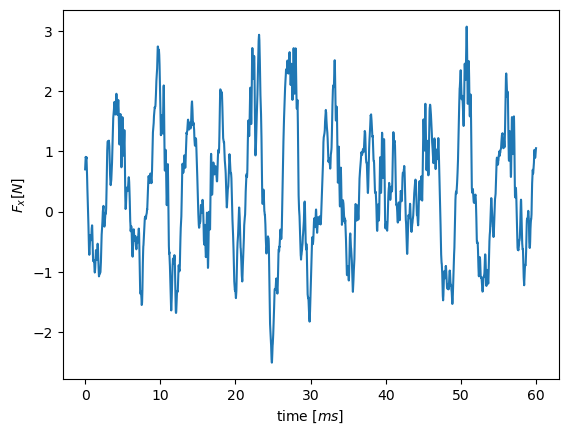

In [8]:
plt.plot(t[:3000],df_cut['Force_X'][:3000], ) # plotting an slice of only 3000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ F_x [N]$')
plt.show()

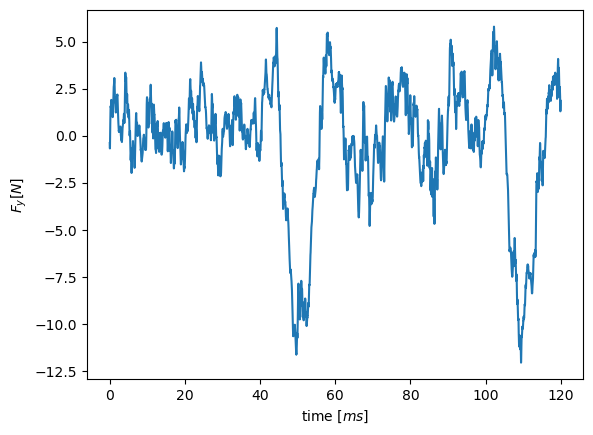

In [9]:
plt.plot(t[:6000],df_cut['Force_Y'][:6000]) # plotting an slice of only 6000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ F_y [N]$')
plt.show()

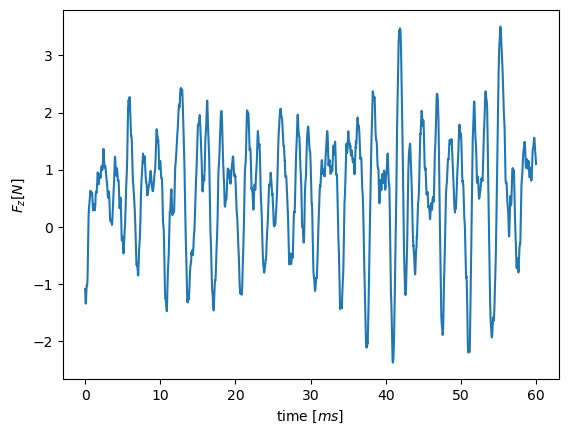

In [10]:
plt.plot(t[:3000],df_cut['Force_Z'][:3000]) # plotting an slice of only 3000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ F_z [N]$')
plt.show()

### Vibrations

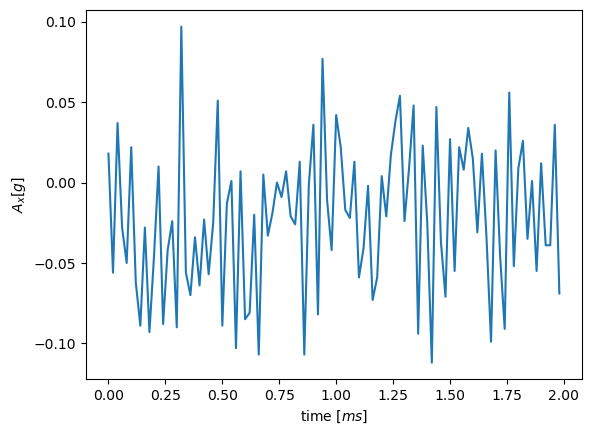

In [11]:
plt.plot(t[:100],df_cut['Vibration_X'][:100]) # plotting an slice of only 100 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ A_x [g]$')
plt.show()

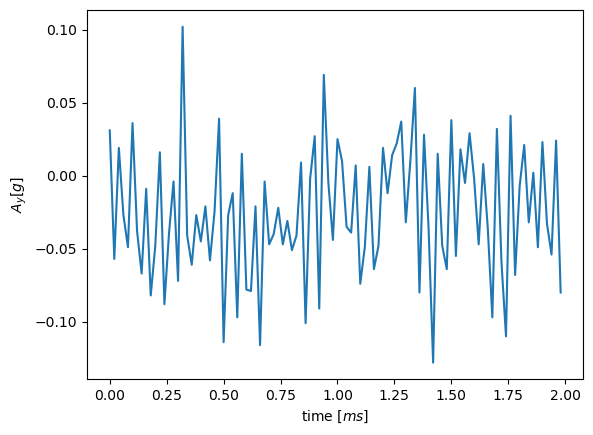

In [12]:
plt.plot(t[:100],df_cut['Vibration_Y'][:100]) # plotting an slice of only 100 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ A_y [g]$')
plt.show()

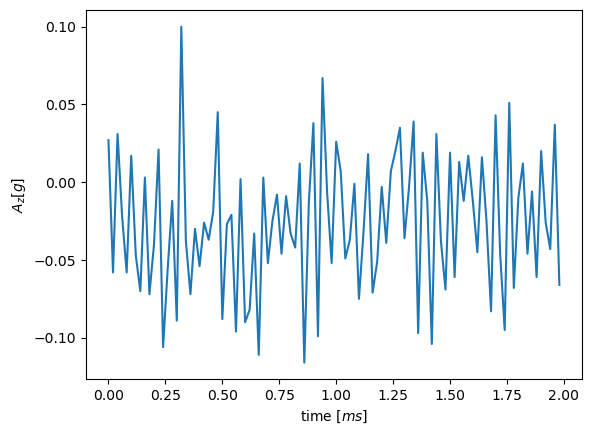

In [13]:
plt.plot(t[:100],df_cut['Vibration_Z'][:100]) # plotting an slice of only 100 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ A_z [g]$')
plt.show()

### Acoustic Emission RMS

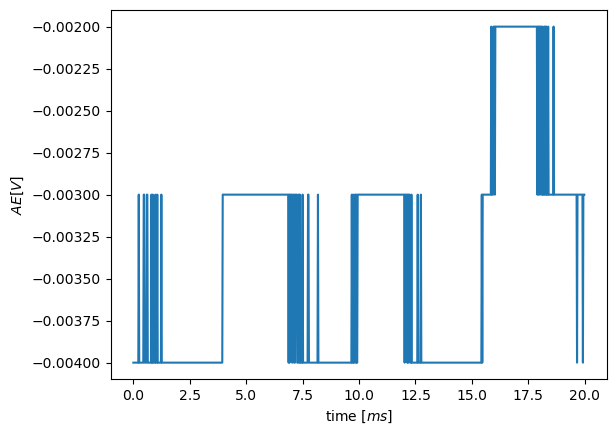

In [14]:
plt.plot(t[:1000],df_cut['AE_RMS'][:1000]) # plotting an slice of only 1000 out of the total number of entries
plt.xlabel(r'time [$ms$]')
plt.ylabel(r'$ AE [V]$')
plt.show()

### Wear

Loading the wear data for the first test:

In [15]:
df_wear = pd.read_csv('../data/raw/c1/c1_wear.csv', sep=',')

Looking for null and missing values

In [16]:
df_wear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cut      315 non-null    int64  
 1   flute_1  315 non-null    float64
 2   flute_2  315 non-null    float64
 3   flute_3  315 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 10.0 KB


Data is complete

Taking a look at the numbers

In [17]:
df_wear.head(10)

,cut,flute_1,flute_2,flute_3
0,1,32.317114,48.892617,37.720825
1,2,37.914879,49.570815,37.720825
2,3,43.087910,50.302867,37.720825
3,4,47.859072,51.083652,37.849851
4,5,52.250329,51.908288,38.172665
5,6,56.282766,52.772127,38.617556
6,7,59.976616,53.670745,39.174556
7,8,63.351288,54.599939,39.834155
8,9,66.425391,55.555716,40.587292
9,10,69.216757,56.534286,41.425337


Plotting the wear as the number of cuts increases

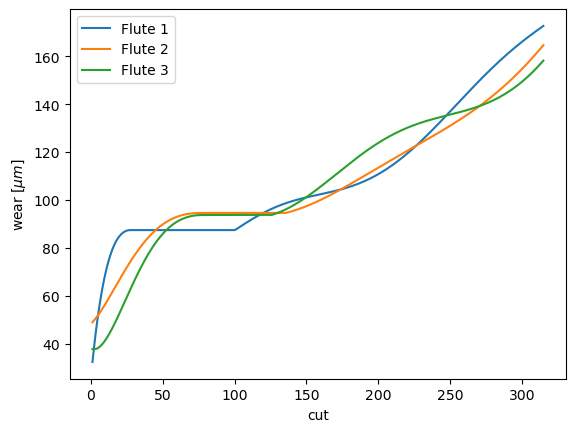

In [18]:
plt.plot(df_wear["cut"], df_wear["flute_1"], label = "Flute 1")
plt.plot(df_wear["cut"] ,df_wear["flute_2"], label = "Flute 2")
plt.plot(df_wear["cut"], df_wear["flute_3"], label = "Flute 3")
plt.xlabel(r'cut')
plt.ylabel(r'wear $[\mu m]$')
plt.legend()
plt.show()

## Signal dependance with the cut number

Going through all the cut files in the c1 folder and calculating the average of each quantity for each cut

In [19]:
import os

folder_path = "../data/raw/c1/c1/"

means_list = []

for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
        df_cut_temp = pd.read_csv(folder_path + filename, sep=',')
        df_cut_temp.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']
        means = df_cut_temp.mean()
        means_list.append(means)
df_means = pd.DataFrame(pd.concat(means_list, axis=1)).T

In [20]:
df_means

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS
0,0.400855,0.629471,0.705146,0.009306,0.013555,0.018199,-0.000060
1,1.028156,1.118592,1.024093,-0.003230,-0.010850,-0.012855,0.038556
2,1.776100,2.347888,1.834001,-0.004906,-0.009859,-0.011772,0.066571
3,2.104932,2.721464,2.024522,-0.001283,-0.004831,-0.005907,0.080003
4,2.831399,2.351181,1.150255,0.015475,0.021318,0.028552,0.089197
...,...,...,...,...,...,...,...
310,19.623448,8.527354,11.945342,0.000200,-0.002899,-0.003668,0.239778
311,19.879400,8.603264,12.125224,0.000351,-0.002996,-0.003485,0.247885
312,18.625247,8.172328,11.297838,-0.000294,-0.003510,-0.004410,0.245514
313,17.553296,7.597814,10.685945,0.000687,-0.002461,-0.002945,0.240731


### Averages of the measurments

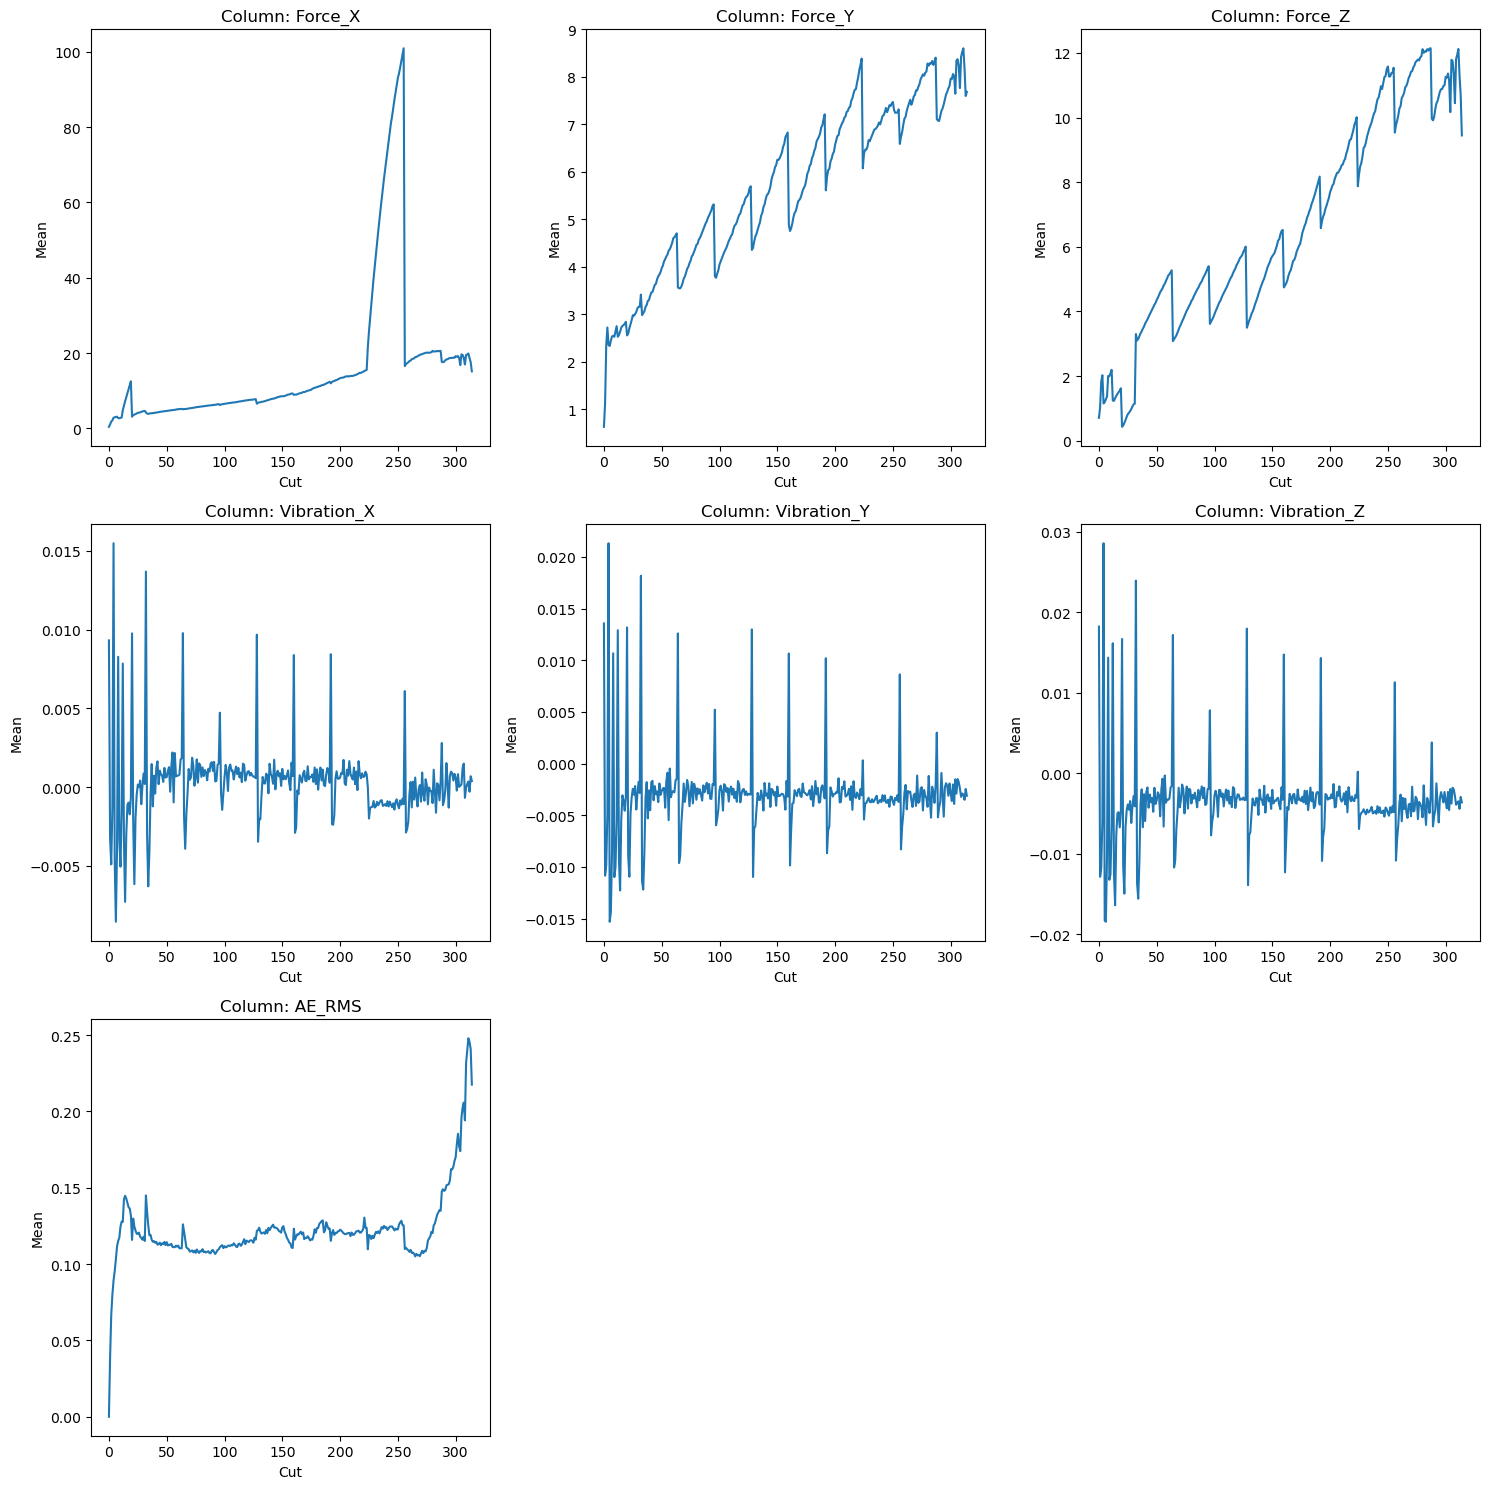

In [21]:
# Generated by ChatGPT
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array to easily iterate
axes = axes.flatten()

# Plot each column in the grid
for i, column in enumerate(df_means.columns):
    axes[i].plot(df_means.index, df_means[column])
    axes[i].set_title(f'Column: {column}')
    axes[i].set_xlabel('Cut')
    axes[i].set_ylabel('Mean')

# Hide any remaining empty subplots if there are less than 9 columns
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

**Forces:** From these plots it can be seen that, overall, forces measured increase as the number of cuts increases, that is as the wear on the milling bit increases. Furthermore Force_X presents an abrupt increase on the measurements around cut 240. This deserves to be compared with the other of dataset samples.

**Vibrations:** The mean of the vibrations is almost zero, further analysis (rms for example) is required.

**Acoustic Emision:** Vibrations increased after some cuts, stayed constant and increased towards the end, presumably due to increased wear of the milling bit, worth comparing to the other sets.

### Correlations

To quantify the possible correlations between the variables and the wear described above, we can calculate a correlation matrix.

Let's join the dataset means and the measured wear into a single pandas dataframe

In [22]:
df_mean_wear = pd.concat([df_means, df_wear[["flute_1", "flute_2", "flute_3"]]], axis=1)

In [23]:
df_mean_wear

,Force_X,Force_Y,Force_Z,Vibration_X,Vibration_Y,Vibration_Z,AE_RMS,flute_1,flute_2,flute_3
0,0.400855,0.629471,0.705146,0.009306,0.013555,0.018199,-0.000060,32.317114,48.892617,37.720825
1,1.028156,1.118592,1.024093,-0.003230,-0.010850,-0.012855,0.038556,37.914879,49.570815,37.720825
2,1.776100,2.347888,1.834001,-0.004906,-0.009859,-0.011772,0.066571,43.087910,50.302867,37.720825
3,2.104932,2.721464,2.024522,-0.001283,-0.004831,-0.005907,0.080003,47.859072,51.083652,37.849851
4,2.831399,2.351181,1.150255,0.015475,0.021318,0.028552,0.089197,52.250329,51.908288,38.172665
...,...,...,...,...,...,...,...,...,...,...
310,19.623448,8.527354,11.945342,0.000200,-0.002899,-0.003668,0.239778,170.981042,161.824508,155.546719
311,19.879400,8.603264,12.125224,0.000351,-0.002996,-0.003485,0.247885,171.411854,162.517989,156.189184
312,18.625247,8.172328,11.297838,-0.000294,-0.003510,-0.004410,0.245514,171.839631,163.218075,156.844309
313,17.553296,7.597814,10.685945,0.000687,-0.002461,-0.002945,0.240731,172.264561,163.924726,157.512083


With this we can simply calculate the correlation using pandas

In [24]:
correlation_matrix = df_mean_wear.corr()

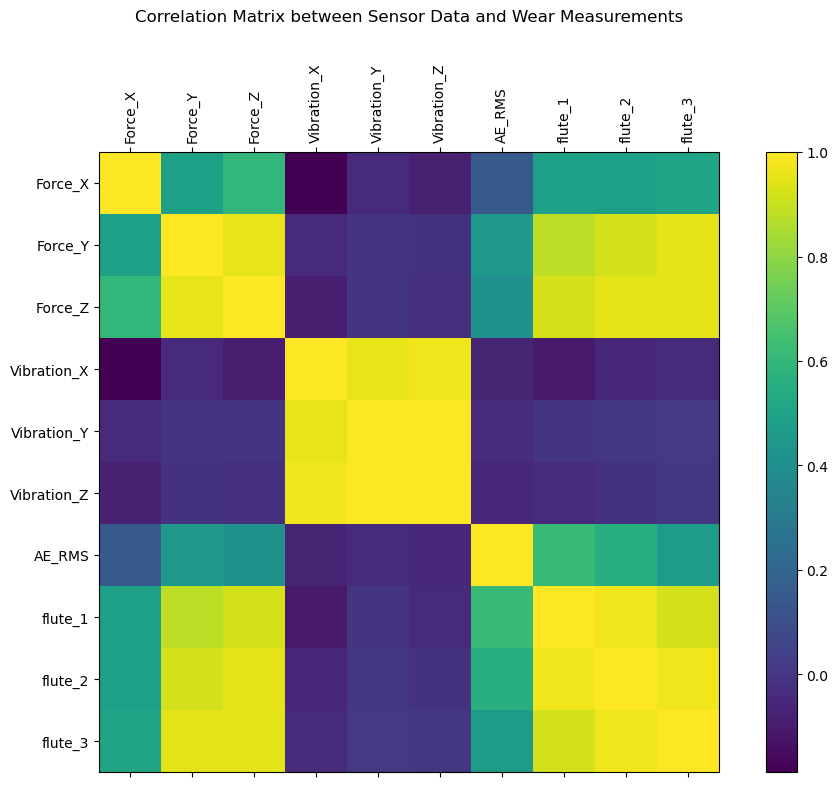

In [25]:
# Generated by ChatGPT

plt.figure(figsize=(12, 8))

plt.matshow(correlation_matrix, fignum=1, cmap='viridis')

plt.colorbar()

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)

plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title('Correlation Matrix between Sensor Data and Wear Measurements', pad=30)

plt.show()

From this plot we see that Force_Y and Force_Z seem to have a strong correlation with the wear on each flute. A linear regression with these variables would be interesting.

## Frequency domain analysis

### Fourier transform of force

In [26]:
from scipy import fft, signal

In [27]:
y = np.asarray(df_cut["Force_X"])

In [28]:
yf = fft.fft(y)
xf = fft.fftfreq(len(y),d=1/50000)

[]

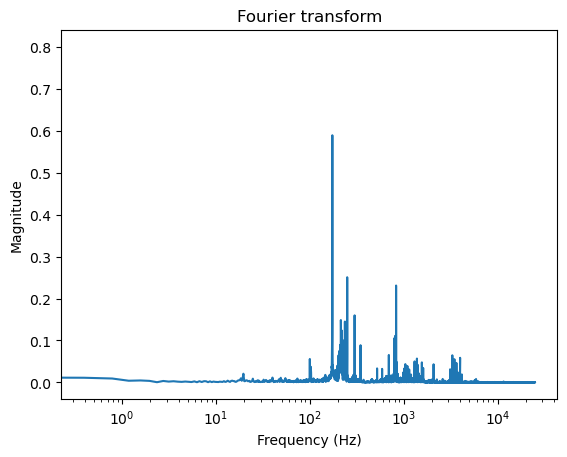

In [29]:
plt.plot(xf[0:n//2], 2.0/n * np.abs(yf[0:n//2]))
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Fourier transform')
plt.plot()

### Wavelet transform

In [30]:
import pywt

In [31]:
sampling_frequency = 50000  # 50 KHz

time = np.arange(len(y)) / sampling_frequency


# Define the wavelet and scales for CWT

wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet


# Define the center frequency of the Morlet wavelet (approximation for cmor wavelet)

center_frequency = 0.8  # Example center frequency for the 'cmor' wavelet



# Calculate the sampling period

sampling_period = 1 / sampling_frequency



# Select scales based on the observed FFT frequencies (e.g., focusing on up to 2000 Hz)

dominant_frequencies = np.linspace(1, 2000, num=200)  # Adjusted range based on FFT plot

scales = center_frequency / (dominant_frequencies * sampling_period)



# Perform the Continuous Wavelet Transform with these scales

coefficients, frequencies = pywt.cwt(y, scales, wavelet, sampling_period=sampling_period)

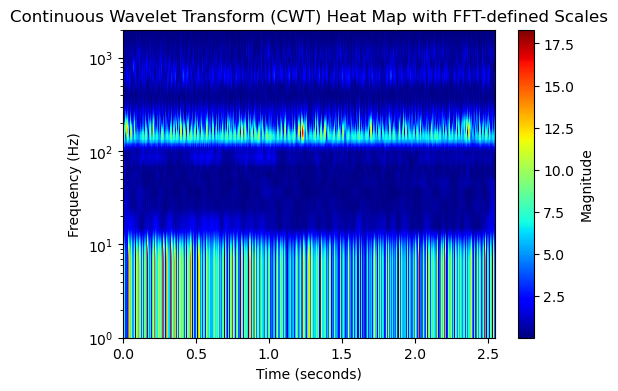

In [68]:

# Plot the wavelet transform as a heat map with FFT-defined scales

plt.figure(figsize=(6, 4))

plt.imshow(np.abs(coefficients), extent=[time[0], time[-1], dominant_frequencies[-1], dominant_frequencies[0]], 

           aspect='auto', cmap='jet')

plt.colorbar(label='Magnitude')

plt.title('Continuous Wavelet Transform (CWT) Heat Map with FFT-defined Scales')

plt.xlabel('Time (seconds)')

plt.ylabel('Frequency (Hz)')

plt.yscale('log')

plt.gca().invert_yaxis()

plt.show()

Turning this into a helper function to analyze different cuts (the function takes a while to run)

In [143]:
def frequency_analysis(data_path, feature="Force_X"):

    df = pd.read_csv(data_path, sep=',', header=None)

    df.columns = ['Force_X', 'Force_Y', 'Force_Z', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'AE_RMS']

    y = np.asarray(df[feature])

    # FFT

    yf = fft.fft(y)
    
    xf = fft.fftfreq(len(y),d=1/50000)

    sampling_frequency = 50000  # 50 KHz

    time = np.arange(len(y)) / sampling_frequency


    # Wavelet

    wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet

    center_frequency = 0.8  # Example center frequency for the 'cmor' wavelet

    sampling_period = 1 / sampling_frequency


    dominant_frequencies = np.linspace(1, 2000, num=300)  # Adjusted range based on FFT plot

    scales = center_frequency / (dominant_frequencies * sampling_period)

    coefficients, frequencies = pywt.cwt(y, scales, wavelet, sampling_period=sampling_period)

    fig, axs = plt.subplots(2, 1, figsize=(5, 7))

    # FFT plot
    axs[0].plot(xf[0:n//2], 2.0/n * np.abs(yf[0:n//2]))
    axs[0].set_xlabel("Frequency (Hz)")
    axs[0].set_title("Fourier Transform")
    axs[0].set_xscale("log")

    # wavelet plot

    plt.imshow(np.abs(coefficients), extent=[time[0], time[-1], dominant_frequencies[-1], dominant_frequencies[0]], aspect='auto', cmap='jet')

    plt.colorbar(label='Magnitude')

    axs[1].set_xlabel("Time (s)")
    axs[1].set_ylabel("Frequency (Hz)")
    axs[1].set_title("Continuous Wavelet Transform (Scaleogram)")
    axs[1].set_yscale("log")
    plt.gca().invert_yaxis()


    plt.tight_layout()

    return fig

Let's analyse the frequency spectrum at different points of the cutting process, signals from cuts 1, 10, 100 and 300.

### F_X

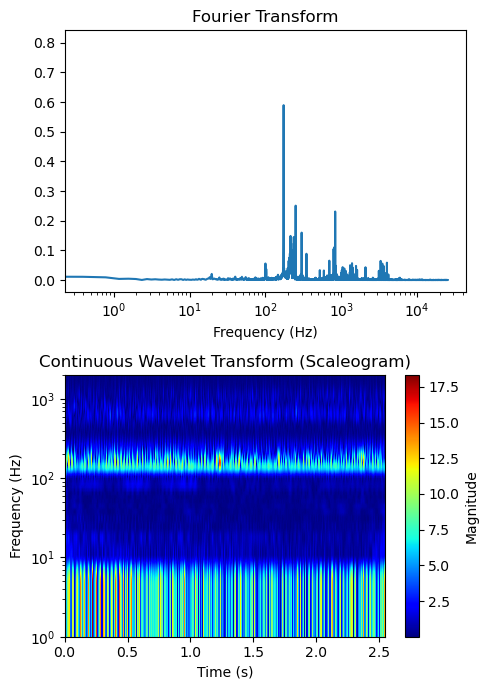

In [144]:
f_analysis_cut_01 = frequency_analysis('../data/raw/c1/c1/c_1_001.csv', feature="Force_X")

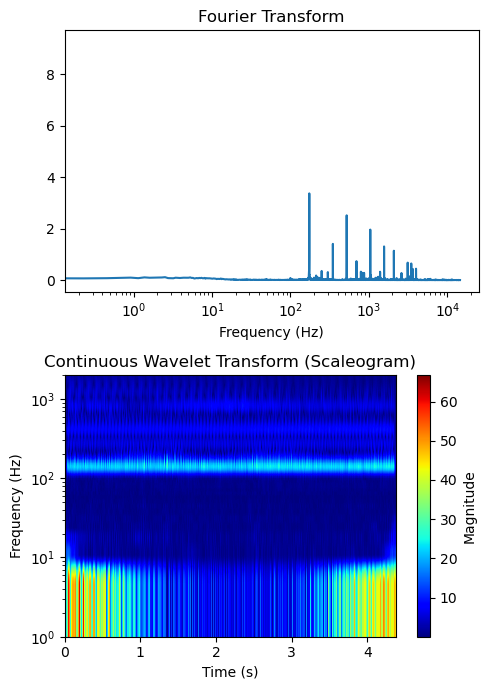

In [145]:
f_analysis_cut_10 = frequency_analysis('../data/raw/c1/c1/c_1_010.csv', feature="Force_X")

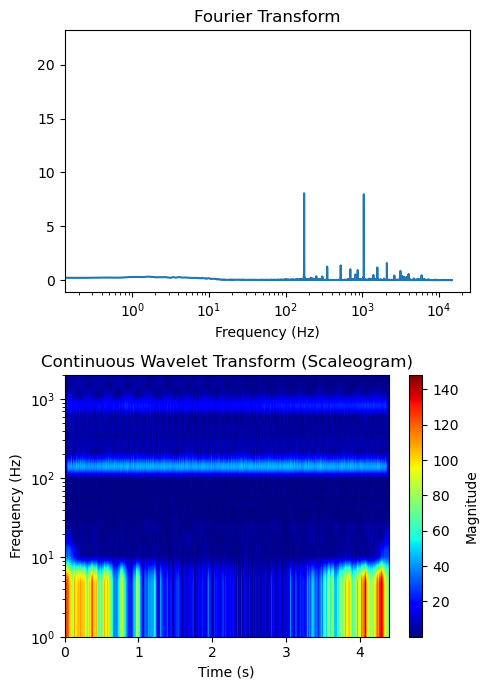

In [146]:
f_analysis_cut_100 = frequency_analysis('../data/raw/c1/c1/c_1_100.csv', feature="Force_X")

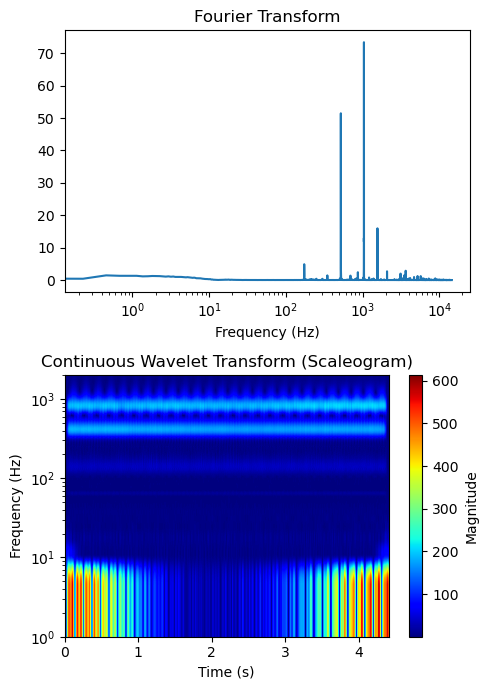

In [147]:
f_analysis_cut_300 = frequency_analysis('../data/raw/c1/c1/c_1_300.csv', feature="Force_X")

From these diagrams we can note some things:
* Low frequencies (0-10 Hz): these components of the signal are very dominant at the beginning and end stages of the cut process. This is possibly due to slow oscillations caused by the milling bit engaging or realeasing the material.
* Mid frequencies (~100 Hz): present all through the cut process there is a component somewhere around 100-200 Hz, this activity matches the frequency of the milling bit: 10400 rpm ~ 170 Hz.
* High frequencies (100-1000 Hz): activity is this frequency incrased with the amount of cuts, this might be a sign of wear. 

### F_y

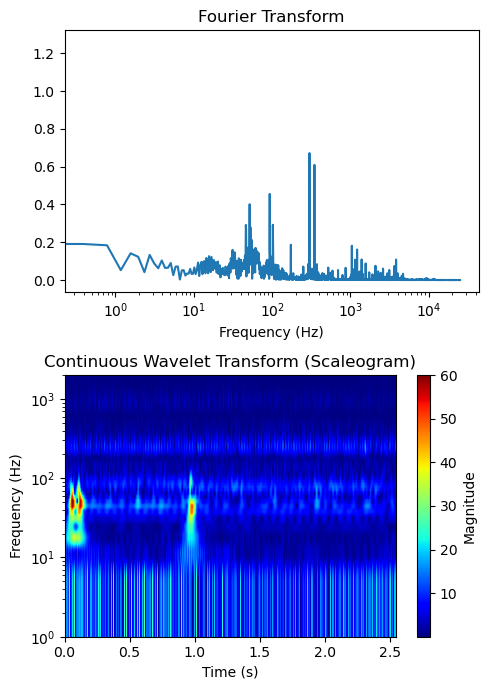

In [148]:
f_analysis_cut_1 = frequency_analysis('../data/raw/c1/c1/c_1_001.csv', feature="Force_Y")

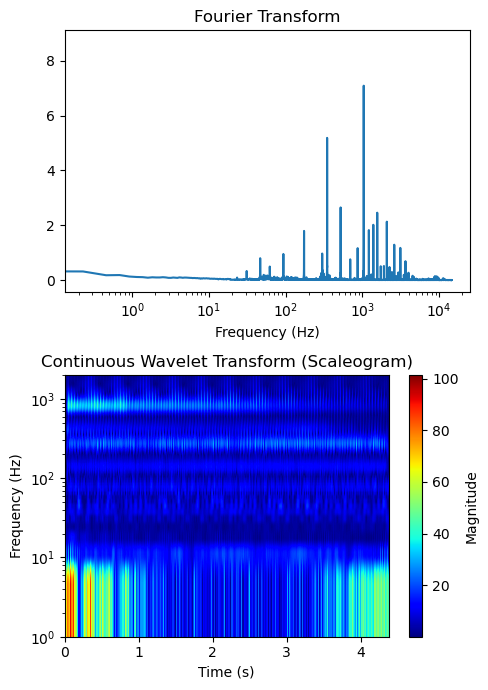

In [149]:
f_analysis_cut_10 = frequency_analysis('../data/raw/c1/c1/c_1_010.csv', feature="Force_Y")

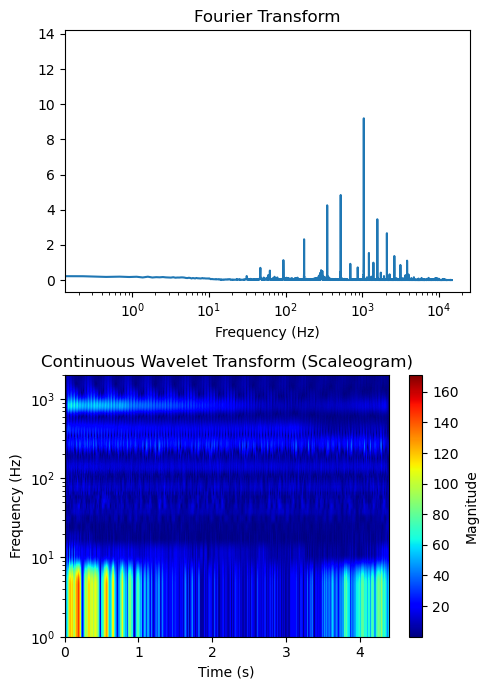

In [150]:
f_analysis_cut_100 = frequency_analysis('../data/raw/c1/c1/c_1_100.csv', feature="Force_Y")

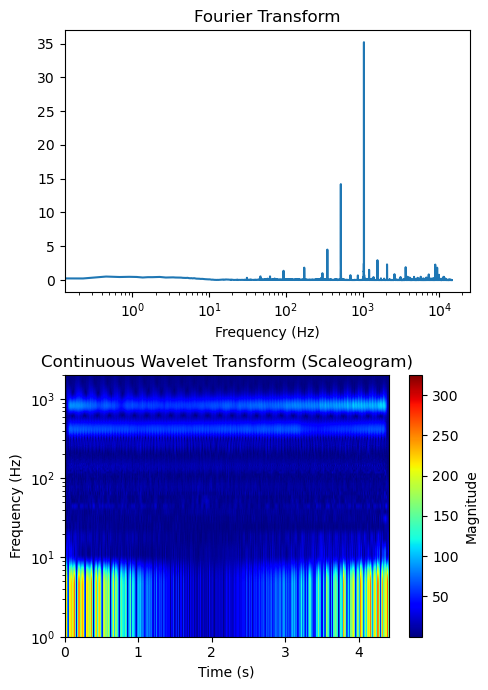

In [151]:
f_analysis_cut_300 = frequency_analysis('../data/raw/c1/c1/c_1_300.csv', feature="Force_Y")

While low and high frequency behavior is similar than that of F_X, the middle frequency range is much more complex. Interestingly however, during the first cut an anomality is observed in the middle range frequency range. 

From this frequency analysis we can see that time-frequency features are useful to describe the cutting process and they are potentially valuable when creating a predictive machine learning model. 